# **Demonstration: Running a pre-trained multiclass classificaiton model on a dataset**
# Import libraries

In [1]:
from pathlib import Path
from json import load
from PDF_MC import PDF_MC 

# Import default configurations

model_config.json has default hyperparameters for the PDF_MC model: 
* number of input features
* nubmer of hidden neurons for each layer
* nubmer of hidden layers
* nubmer of training epochs
* learning rate
* batch size
* momentum

In [ ]:
PACKAGE_PATH = Path.cwd()
with open("./model_config.json", "r") as f:
    json_dict = load(f)
    PDF_MC_config = json_dict["model"]["PDF_MC"]
PDF_MC_config

{'num_input_features': 5,
 'num_hidden_neurons': 128,
 'num_hidden_layers': 5,
 'num_epochs': 300,
 'learning_rate': 0.001,
 'size_batch': 32,
 'momentum': 0.9}

# Update the config

Input/output paths and training-specific hyperparameters should be updated before traning

* Input/output paths
    * `input_csv_path`: the path of the input csv file of photometric redshift
    * `output_pdf_path`
    * `model_path`: the path of the saved model

* Training-specific hyperparameters (**can be set to arbitrary values for only running**)
    * `CO_ratio`
    * `weights`: written in the format of [[range...], [weights...]]
    * `train_ratio`: the ratio of a training set -- a value in between 0 and 1
    * `rebalance`: perform rebalancing if set to True
    * `rebalance_list`: a list of ranges and weights to rebalance; written in the same format as weights
    * `evaluation`: perform base-evaluation if set to True
    * `evaluation_ratio`: the ratio of a base evaluation set -- a value in between 0 and 1

* Others
    * `model_no`: model number (not a hyperparameter) 

In [ ]:
PDF_MC_config.update({
    "input_csv_path": PACKAGE_PATH / 'data/relz_EPDF.csv',
    "output_dir_path": PACKAGE_PATH,
    "model_path": PACKAGE_PATH / 'data/PDF_MC_model_relz_EPDF.pth',

    # hyperparameters
    "CO_ratio": 0.25,
    "weights_list": [[1, 2], [2, 15]],
    "train_ratio": 0.999,
    "rebalance": True,
    "rebalance_list": [[2,3,4], [0.5, 0.5, 0.5]], # for relz
    "evaluation": True,
    "evaluation_ratio": 0.3,
    'model_no': 0
})

# Create a model instance

The constructor takes all the parameters specified in the previous cell. If any of them is missing, it will raise an error.

In [7]:
PDF_MC_model = PDF_MC(**PDF_MC_config)

# Run the model on a dataset

`PDF_MC.preprocess_data()` loads the input CSV files from the specified paths and preprocess the data in an appropriate format to be evaluated.

`PDF_MC.build_dl()`
* takes the formatted data, returned by `PDF_MC.preprocess_data()`
* returns a dictionary of `DataLoader` objects to be evaluated

`PDF_MC.evaluate_model`
* takes the original data and the DataLoader dictoinary
* returns the multiclass classification results

`PDF_MC.save_results`
* takes the original data to compare and the results
* generates a scatter plot: spectroscopic redshift vs. photometric redshift
* saves the predicted CO status result

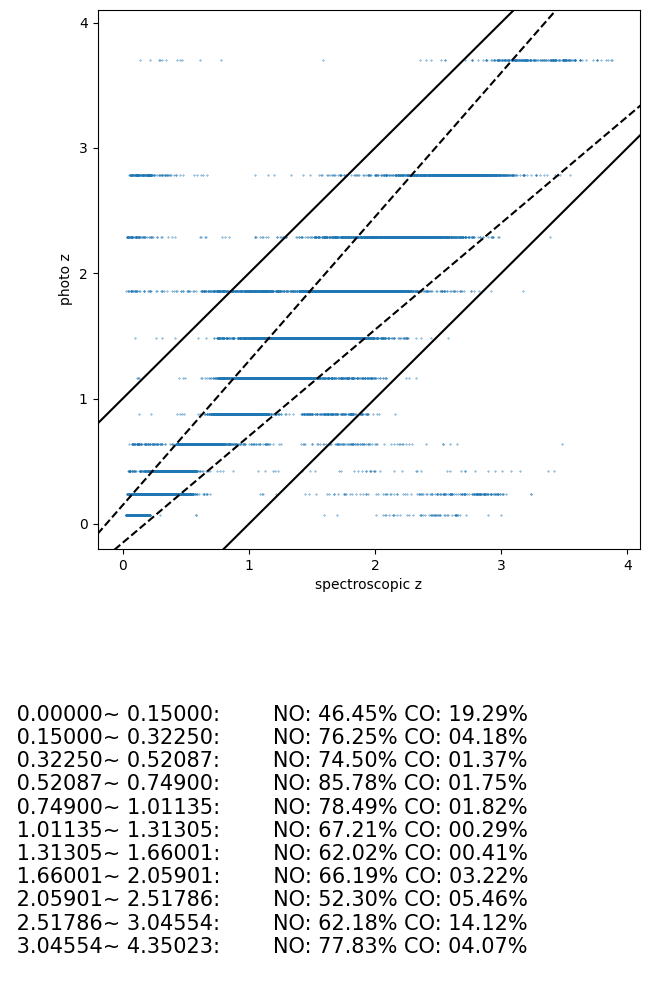

In [8]:
PDF_MC_model = PDF_MC(**PDF_MC_config)

data = PDF_MC_model.preprocess_data()
dl = PDF_MC_model.build_dl(data)
results = PDF_MC_model.evaluate_model(data, dl)
PDF_MC_model.save_results(data, results)